# IMDS Computer Workshop 2  
### *By Jeffrey Giansiracusa - Michaelmas 2023*
    
This workshop connects with videos:
* 1.1 Basics of functions
* 1.2 Calculus - differentiation
* 1.3 Optimisation
* 1.4 Modelling with differential equations


Key skills to focus on:
* The idea of the derivative of $f(x)$ and slope of the tangent line
* How we approximate $f'$  as $\frac{f(x+h) - f(x)}{h}$
* Given the graph of a function, sketch the graph of its derivative
* Given the graph of $f'$, sketch the graph of $f$ and identify local minima and maxima
* Use the 4 rules of differentiation (linearity, product rule, quotient rule, chain rule) and a table of derivatives to differentiate various functions
* Use a table of values to estimate the derivative of a function at a point
* Building some intuition for simple differential equation models

Some of these questions will involve a bit of Python code.  Others are to be done the 'old fashioned way' with a piece of paper and a pencil or pen.


## Here is a quick summary of some key facts about differentiation that you might find useful.

Table of some common derivatives:

* constant function $f(x)=C$ ---> $f^\prime(x)=0$                      
* $f(x)=x$              ---> $f^\prime(x)=1$                        
* $f(x)=x^n$ --- $f^\prime(x)=nx^{n-1}$ (this works when $n$ is any real number)
* $f(x)=\sin (x)$       ---> $f^\prime (x)=\cos (x)$                
* $f(x)=\cos (x)$       ---> $f^\prime (x)=-\sin (x)$               
* $f(x)=e^x$            ---> $f^\prime(x)=e^x$                      
* $f(x)=a^x, a>0$       ---> $f^\prime(x)=a^x \ln(a)$               
* $f(x)=\ln (x)$        ---> $f^\prime(x)=\frac{1}{x}$

<!---
 $f(x)=\tan (x)$       --- > $f^\prime (x)=\frac{1}{\cos^2 (x)}$    
 $f(x)=\cot (x)$       --- > $f^\prime (x)=-\frac{1}{\sin^2 (x)}$   --->


The most important rules for differentiation:
* Linearity:  $\frac{d}{dx} (Af(x) + Bg(x)) = Af'(x) + Bg'(x)$
* Product rule: $(fg)' = f' g + f g'$
* Chain rule: $f(g(x))' = f'(g(x))g'(x)$



# Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [ ]:
import math
import numpy as np
import sympy as sym

from scipy.integrate import solve_ivp

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

exec(open('workshop2support.py').read())


---

## Exercise 1

Python is a fantastic computer language for doing data science and mathematics.  For now, we're not going to have to do any significant coding.  We're just going to use Python as a fancy graphing calculator.

Let's get used to using Python for mathematics.

### Arithmetic operations
* \* means times;
* \+ means addition
* \- means subtraction
* a\**b means $a^b$ 
* The square root of a number can be computed in either of two ways: a\**0.5 or math.sqrt(a).  (This second option is making use of the sqrt function that is defined in the math module that we imported just above.)

The **math** module provides all sorts of useful things for doing mathematics in Python.  You can look at the documentation here: https://docs.python.org/3/library/math.html to see the complete list of what it can do.

If you want to use functions like sine and cosine, log, exponential, etc, these are defined in the math module:
* math.sin(a), math.cos(a), math.tan(a), ...

The math module also provides some useful constants like:
* $\pi$ is math.pi
* $e$ is math.pi


### 1.1 Some warm-up tasks to try
In the code cell below, try to compute: 
* $a = \sqrt{2\pi}$
* $b = \cos(30^\circ)$  (You will have to convert degrees to radians.)
* $c = \sin(30^\circ)$  
* $d =  b^2 + c^2$

In [ ]:
# Type some code here.  Then execute it by typing Shift-Return.

a = ...
b = ...
c = ...
d = ...

---

## Exercise 2

The Python function **f1(..)** has been defined for you (in the workshop2support.py file).  It takes a number as input and produces a number as output, so it is a function $\mathbb{R} \to \mathbb{R}$.  

There is a formula for the function, but the goal in this question is to work with the function without looking at the formula.  Instead, we will explore the function *numerically* by feeding inputs to the function and then doing things with the outputs.  (It is a very common situation in data science to be able to see the inputs and outputs of a function but not a formula for it.)

### 2.1 Look at the graph
The first thing we usually do when we meet a new function is we look at its graph.  Try executing the Python code below to look at the graph.  This code uses the excellent Bokeh library for plotting.  Click in the box below and then hit the play button or type SHIFT-ENTER.

In [ ]:
# Here is some code to view the graph of the function with Bokeh

# Create a list of number from 1 to 10 in steps of 0.1.  These will be the x values.
xdata = list(np.arange(0,10,0.1))

# Now create a corresponding list of y values.  
# The nth entry in this list if the value of the
# function f1 at the nth entry of the xdata list.
ydata = [f1(x) for x in xdata]

# This bit of code below uses Bokeh to plot our data.

# First we create the plot canvas called ourplot
ourplot = figure(width=600, height=600, title="Graph of f1")

# Then we plot the data, with points joined by lines.
ourplot.line(xdata, ydata, line_width=2)

# Finally, we can make the canvas visible.
show(ourplot)


### 2.2 Now here are some tasks to try

You don't need to do any fancy coding here.  Just use Python as a calculator to get f1(x) for various values of x and do some arithmetic.

 1. Notice that the function has local minimum near $x=3.5$.  Can you get a more precise estimate of where the local minimum is located? Don't just look at the graph.  Try plugging in values like f1(3.5), f1(3.51), f1(3.52) etc.
 2. Next, estimate the value of the derivative, f1', at the point $x=2$.  You can get a rough estimate by looking at the graph.  Can you get a better estimate using the function itself?  Remember that the derivative is approximated by the slope of a chord $\frac{f(x+h) - f(x)}{h}$ as $h$ gets smaller and smaller.  Compare your estimate from looking at the graph to your calculation.
 3. Estimate the value of the derivative, f1', at the point $x=6$.
 4. How precise do you think you estimates are?  How would you make them more precise?  Do you know the difference between **precision** and **accuracy**?




---

## Exercise 3

This question is to be done on by hand on a piece of paper (or drawing on a tablet). Consider the function $f(x)$ shown below. Try to sketch the graph of the derivative $f'(x)$.  Pay attention to where $f'(x)$ crosses the x-axis. 

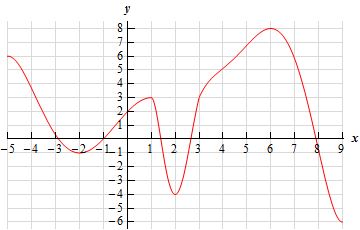

---

## Exercise 4

Suppose $f(x)$ is a function such that the derivative is positive, negative, or zero according to the figure below.

 1. Sketch the graph of $f(x)$.
 2. Where are the local minima and maxima of $f$?
  
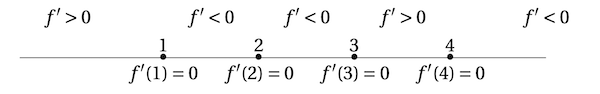

---

## Exercise 5

### 5.1 First task - differentiation by hand
For those of you who feel confident with formulae:
use the rules of differentiation (given up above) to compute the derivatives of the following functions **by hand**.

1. $f(x)=\cos(2x)-\sin{x}$.
2. $f(x)=\sqrt{1+x^2}$.
3. $f(x)=(2-x^2)\cos (x^2)$.
4. $f(x)=\sin(\sin x)$.
5. $f(x)=\frac{x}{\sqrt{4-x^2}}$.
6. $f(x)=e^{4x^2}$.
7. $f(x)=e^{\sqrt{x}}$.
8. $f(x)=\ln(1+x^2)$.


Computing derivatives of formulae is an *algorithmic process*.  You just follow the rules and you will arrive at the answer. Sometimes applying the rules might look daunting or confusing, and there might be many steps to keep track of, but it doesn't require any creativity.

This situation sounds like just the sort of thing that computers are good at!  This is an entry point to the subject of *symbolic algebra*.  Python has the ability to compute many derivatives for you using the **SymPy package**.  It is a fairly powerful package that can do a lot of cool things.

* The SymPy official documentation is here: https://docs.sympy.org/latest/index.html
* You can read about using SymPy to do calculus here: https://vknight.org/pfm/tools-for-mathematics/03-calculus/tutorial/main.html



In [ ]:
# We are going to use the symbol x as our variable, so we need to tell this to SymPy.
x = sym.Symbol("x")

# Now we can define formulae using this variable.  
# Mostly we can do this using what looks like ordinary Python arithmetic involving x.
exp1 = 1 + x**2
exp2 = (1-x)*(1+ 2*x**2)

**Caution:** If we want to use functions like sin or cosine, we need to use the symbolic version provided by Sympy (rather than the numeric version from the math module).

In [ ]:
# This won't work - you should get a big TypeError message
expression = math.sin(x)

In [ ]:
# But this will work
expression = sym.sin(x)

You can ask SymPy to differentiate symbolic expressions for you like this:

In [ ]:
expression = x**2 + sym.cos(x)

# Differentiate the expression with respect to x
output = sym.diff(expression,x)

output

### 5.2 Second task - differentiation by computer

Use SymPy to differentiate the functions from the first task.

In [ ]:
# Put some code here.

exp1 = ...


### 5.3 Third task - computer differentiation with parameters

Now suppose you have a function like $f(x) = Ax^2 + Bx + C$ where we don't know what the values of $A$, $B$ and $C$ are.  (They are parameters.) Can you figure out how to use SymPy to differentiate this?



In [ ]:
# Put some code here.

exp1 = ...


### The opposite of differentiation

SymPy can also go in the reverse direction:  you give it a function $f(x)$ and it tries to find a function $g(x)$ that has $f(x)$ as its derivative. This is called finding an *antiderivative*.  We'll see more on this next week.  Computing the derivative of a function is entirely striaghtforward, but surprisingly, finding an antiderivative is much more complicated and not always possible.

In [ ]:
# Here is a simple example of using sym.integrate to find an antiderivative.

expression = x**3 / 4 + x
sym.integrate(expression, x)

### 5.4 Fourth task - calculating antiderivatives
Try using SymPy to find antiderivatives of the following functions:
* $f(x) = 3x^2$
* $f(x) = \sin(x)$
* $f(x) = \frac{1}{1-x}$
* $f(x) = \sqrt{1 - x^3}$
* $f(x) = \sqrt{1 - x^4}$
* $f(x) = \sin(\sin(x))$

In [ ]:
# Type some code here


---

## Exercise 6 - Differential equations and modelling

Now we come to differential equations and their use in mathematical modelling.

### A quick bit of review

From the lecture video, recall the simple differential equation
$$ \frac{df}{dt} = \alpha f(t),$$
where $\alpha$ is some positie constant.  This could describe a population growing; $f(t)$ represents the side of the population at time $t$, and the equation says that the rate of growth is proportional to the size of the population.  E.g.  the number of babies born in a country is proportional to the population of the country.  Canada has about 1/10 as many people as the US and 1/10 as many babies born each year.

You can check that $f(t) = A e^{\alpha t}$ is a solution for any value of $A$.  It turns out that there aren't any other solutions; this is all there is. 

Note that $Ae^{\alpha 0} = A$, so if we decide what the value of $f(0)$ is (the initial population), then this determines $A=f(0)$ and so we know how to compute the value of $f(t)$ for all values of $t>0$.  This is a general principle with differential equations of this type.  If you know the **initial value** $f(0)$, then the equation uniquely determines $f(t)$ for all future times.

### A nice class of differential equations

We're going to consider equations of the following form:
$$
\frac{df}{dt} = G(t,f(t)).
$$
The right hand side function $G$ takes two inputs.  This says that the rate of change of $f$ depends on the current time, and on the current value of $f(t)$.   Here are some examples:
* $G(t,f) = \mathrm{constant}$ says that the rate of increase of $f$ is a constant.  So $f(t)$ is a line and the slope is the constant.
* $G(t,f) = \alpha f(t).$  This is the exponential growth we saw above.
* $G(t,f) = \alpha t f(t).$ This is like saying that your bank account is earning an interest rate of $\alpha t$, so the interest rate is increasing linearly with time.  

### Task 6.1

Suppose we are measuring time in hours and $f(t)$ is the height of some plant.  This plant likes to grow during the day when it is collecting lots of energy through sunlight, and at night it is dormant.  During the day its growth rate is proportional to its size, and at night the growth rate is zero.  Write out a differential equation that could model this situation.

We're tracking a weather balloon as it floats around the Earth.  The longitude of the balloon is $L(t)$.  The balloon moves with a speed proportional to the wind speed.  If the wind


### Task 6.2

The code below uses the **solve_ivp**  method from the SciPy module to solve a differential equation  $\frac{df}{dt} = G(t,f(t))$ where $G= f(t)$, so we're looking at the simple exponential growth scenario.  Your task is to modify the definition of $G$ to simulate the two models you built in Task 6.1 above. 

In [ ]:
def G(t, f):
    return f

sol = solve_ivp(G, [0, 15], [2], rtol = 1e-5)

solutionplot = figure(width=600, height=600, title="Graph of the solution")
solutionplot.line(sol.t, sol.y[0], line_width=2)
show(solutionplot)
